## Facial Landmark Detector with DLIB



**Download NN Face Detetor [pretrained model](http://arunponnusamy.com/files/mmod_human_face_detector.dat)**

**Download Facial Landmark Detetor [pretrained model](https://github.com/AKSHAYUBHAT/TensorFace/raw/master/openface/models/dlib/shape_predictor_68_face_landmarks.dat)**

In [1]:
import cv2
import dlib
import time
import numpy as np
import matplotlib.pyplot as plt

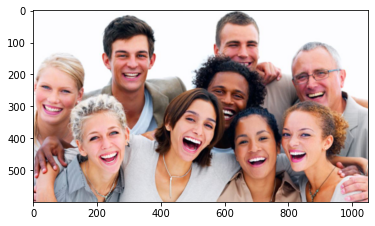

In [2]:
image_path = '2.jpg'
image = plt.imread(image_path)
plt.imshow(image, cmap='binary')

### Compare HOG & NN Dlib Face Detection Time

In [3]:
hog_facial_detect = dlib.get_frontal_face_detector()
cnn_facial_detect = dlib.cnn_face_detection_model_v1('Dlib/mmod_human_face_detector.dat')

start = time.time()
faces_hog = hog_facial_detect(image, 1)
end = time.time()
print("HOG Execution Time:", format(end - start, '.2f'), 's')

start = time.time()
faces_cnn = cnn_facial_detect(image, 1)
end = time.time()
print("CNN Execution Time:", format(end - start, '.2f'), 's')

HOG Execution Time: 0.27 s
CNN Execution Time: 14.57 s


### Draw Face Detection

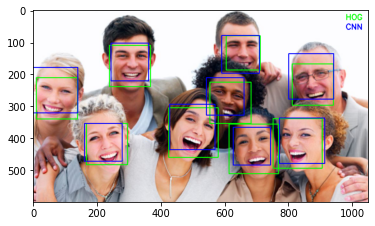

In [4]:
image = plt.imread(image_path)
for face in faces_hog:
    cv2.rectangle(image, 
                (face.left(), face.top()), 
                (face.right(), face.bottom()), 
                (0, 255, 0), 2)
for face in faces_cnn:
    cv2.rectangle(image, 
                (face.rect.left(), face.rect.top()), 
                (face.rect.right(), face.rect.bottom()), 
                (0, 0, 255), 2)
    
img_height, img_width = image.shape[:2]
cv2.putText(image, "HOG", (img_width-70,30), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                (0,255,0), 2)
cv2.putText(image, "CNN", (img_width-70,60), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                (0,0,255), 2)

plt.imshow(image, cmap="binary")

### Facial Landmark Detection

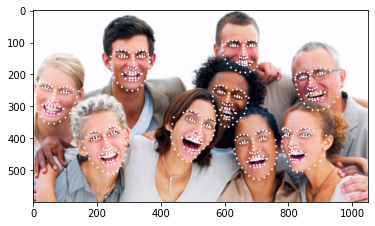

In [5]:
facial_detect = dlib.shape_predictor('Dlib/shape_predictor_68_face_landmarks.dat')
image = plt.imread(image_path)
for face in faces_hog:
    points = facial_detect(image, face)
    landmark = list(map(lambda p: (p.x, p.y), points.parts()))
    for idx in range(len(landmark)):
        cv2.circle(image, (landmark[idx][0], landmark[idx][1]), 1, (255, 255, 255), 4)
plt.imshow(image, cmap="binary")